In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train.shape,'-------------',y_train.shape,"\n" , X_test.shape,'-------------',y_test.shape)

(60000, 28, 28) ------------- (60000,) 
 (10000, 28, 28) ------------- (10000,)


In [4]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

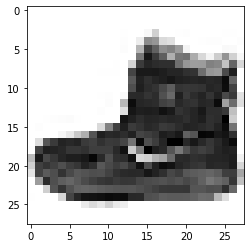

In [5]:
# plt.figure(figsize=(2,2))
plt.imshow(X_train[0],cmap='Greys')

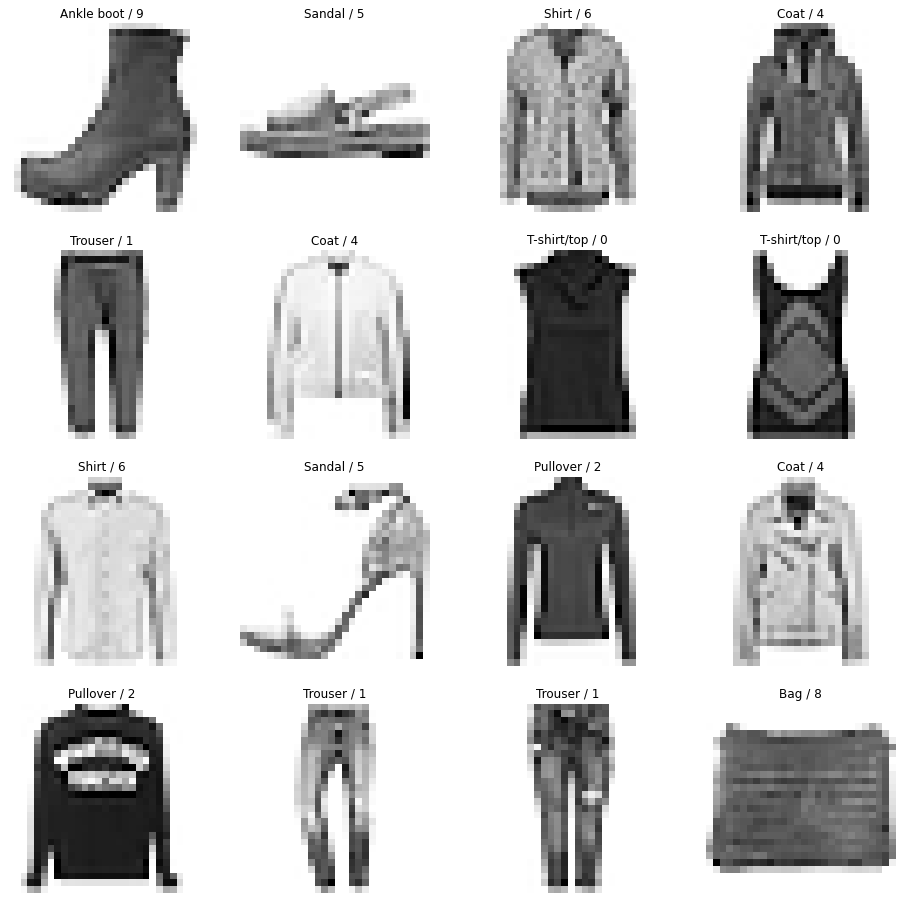

In [6]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,16):
  plt.subplot(4,4,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [7]:
X_train.ndim

3

In [8]:
X_train = np.expand_dims(X_train,-1)

In [9]:
X_train.ndim

4

In [10]:
X_test=np.expand_dims(X_test,-1)

In [11]:
X_train = X_train/255
X_test= X_test/255

In [12]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [13]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [14]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,epochs=50,batch_size=128,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1729 - accuracy: 0.9372 - val_loss: 0.3075 - val_accuracy: 0.9072
Epoch 2/50
375/375 [==============================] - 41s 110ms/step - loss: 0.1664 - accuracy: 0.9397 - val_loss: 0.2998 - val_accuracy: 0.9046
Epoch 3/50
375/375 [==============================] - 42s 113ms/step - loss: 0.1586 - accuracy: 0.9433 - val_loss: 0.3015 - val_accuracy: 0.9078
Epoch 4/50
375/375 [==============================] - 42s 112ms/step - loss: 0.1515 - accuracy: 0.9455 - val_loss: 0.3199 - val_accuracy: 0.9013
Epoch 5/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1471 - accuracy: 0.9463 - val_loss: 0.3166 - val_accuracy: 0.9068
Epoch 6/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1356 - accuracy: 0.9518 - val_loss: 0.3326 - val_accuracy: 0.9001
Epoch 7/50
375/375 [==============================] - 41s 110ms/step - loss: 0.1334 - accuracy: 0.9515 - val_loss: 0.3294 - val_ac

In [19]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 4s 12ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.6791 - accuracy: 0.9005


[0.6791412830352783, 0.9004999995231628]

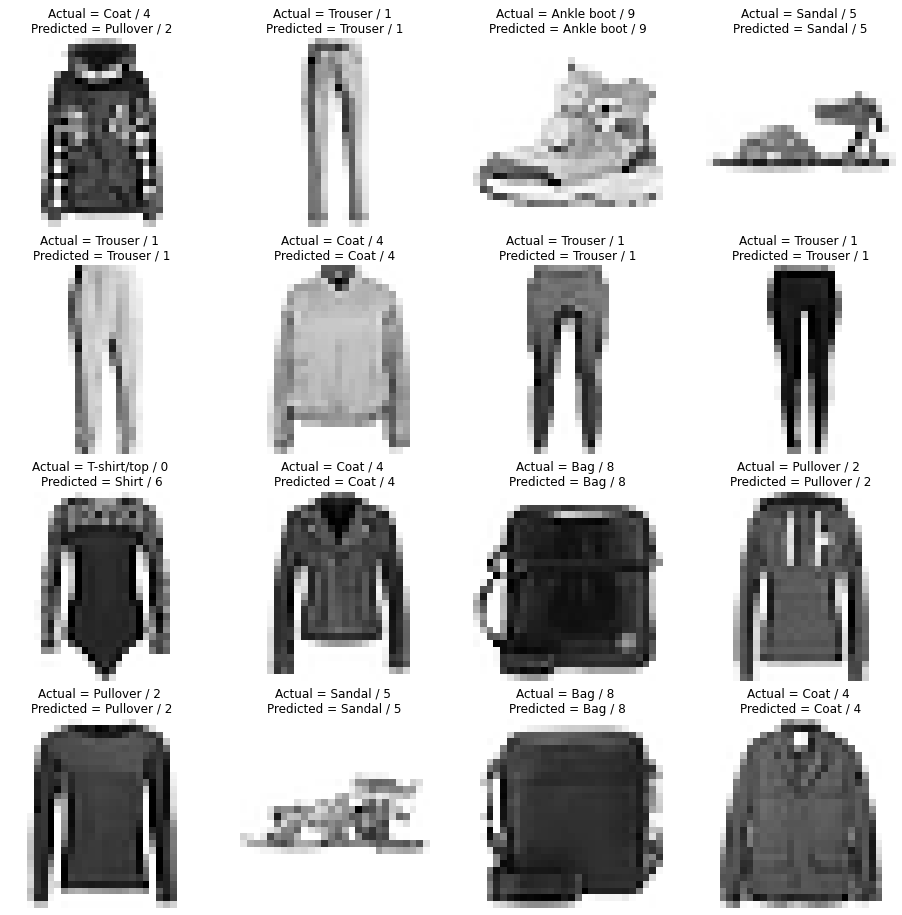

In [22]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,16):
  plt.subplot(4,4, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

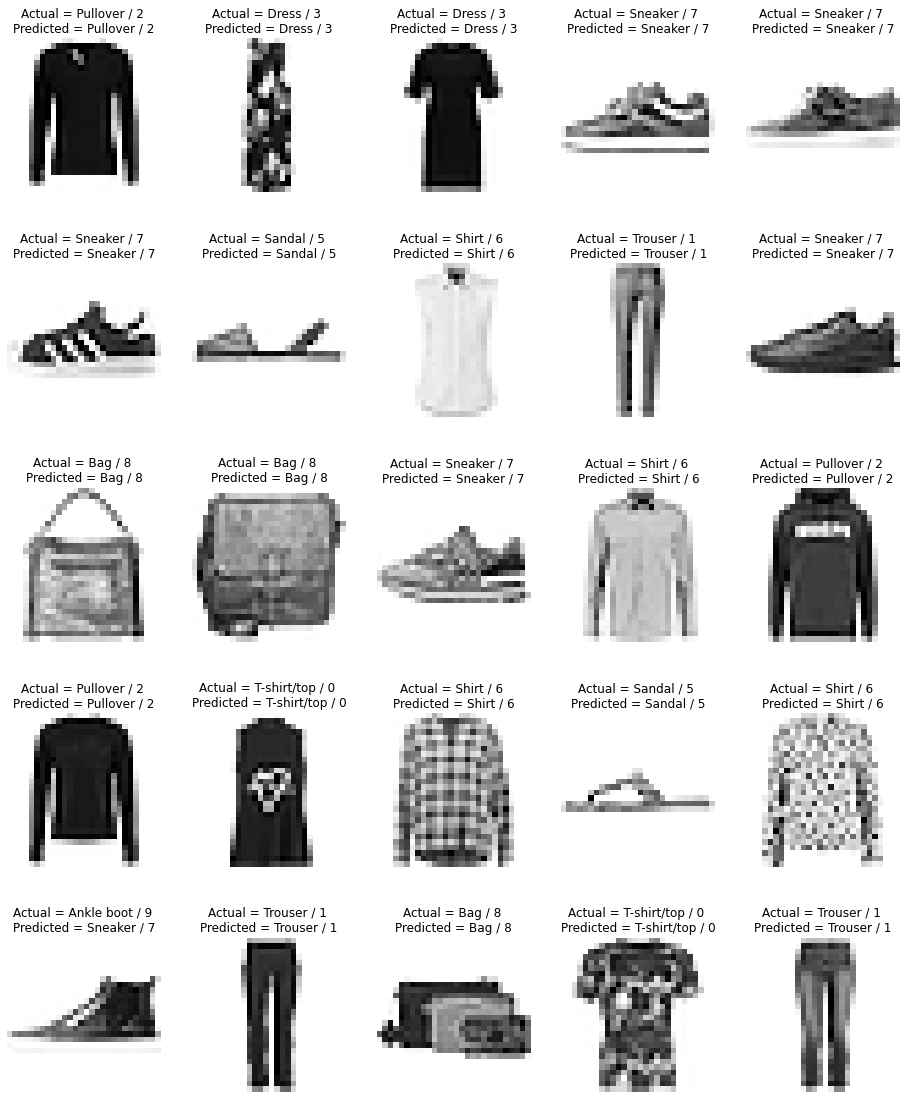

In [23]:
plt.figure(figsize=(16,20))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [24]:
"""## Confusion Matrix"""
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.80      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.83      0.84      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.69      0.78      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



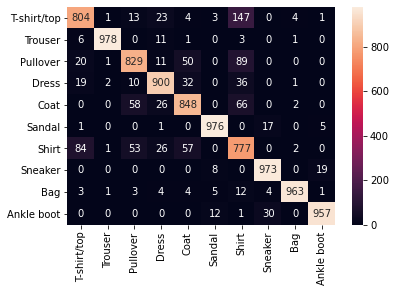

In [25]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [26]:
model.save('fashion_mnist_cnn_model.h5')

In [27]:
import pickle
pickle.dump(model,open("./fashion.sav","wb"))

INFO:tensorflow:Assets written to: ram://0d8e3810-53f3-4e8e-b42d-7cfcf419d80f/assets


INFO:tensorflow:Assets written to: ram://0d8e3810-53f3-4e8e-b42d-7cfcf419d80f/assets


In [28]:
tf.keras.models.save_model(model,"model_fc.hdf5")

webapp with streamlit - mnist fashion classification

In [ ]:
# !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=3c6fb688d7b94fb83eda443606dfa2e19646798a959fba94d0cdc7d93ded76d1
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf


st.set_option("deprecation.showfileUploaderEncoding",False)
@st.cache(allow_output_mutation=True)
def load_modal():
  model=tf.keras.models.load_model('/content/model_fc.hdf5')
  return model

st.write("""
        # Fashion classification
        """)

file = st.file_uploader("Please upload an fashion image",type=["jpg","png","jpeg"])

import cv2
from PIL import ImageOps

def import_and_predict(image_data,model):
  size=(28,28)
  image=ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape = img[np.newaxis,...]
  pred = model.predict(img_reshape)
  return pred

if file is None:
  st.text("Upload the image")
else:
  image=Image.open(file)
  st.image(image,use_column_width=True)
  pred = import_and_predict(image,model)
  string = class_labels[np.argmax(pred)]
  st.success(string)


Writing app.py


In [ ]:
# !pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19866 sha256=f959230487e5ff57aa21d1dcefb404c2efe5d2834157ba98f479fea71e13dbef
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
# !ngrok authtoken 2TOReoZXoDHzNyFAYQr8gvh49dZ_6oJ5NTjwJtKDHQNXb2gEh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# !nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
# from pyngrok import ngrok
# url=ngrok.connect(port=8501)
# url

PyngrokNgrokHTTPError: ignored

In [ ]:
# !cat /content/nohup.out




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.65.94:8501

